In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Датасет содержит 100,000 наблюдений космоса в рамках проекта Sloan Digital Sky Survey (SDSS). Каждое наблюдение содержит 18 признаков.

Весь перечень признаков:
1. obj_ID = идентификатор объекта
2. alpha = прямой угол восхождения (Right Ascension angle)
3. delta = угол склонения (Declination angle)
4. u = интенсивность при наличии ультрафиолетового фильтра
5. g = интенсивность при наличии зеленого фильтра
6. r = интенсивность при наличии красного фильтра
7. i = Интенсивность при наличии фильтра ближнего инфракрасного диапазона
8. z = Интенсивность при наличии инфракрасного фильтра
9. run_ID = номер запуска
10. rereun_ID = номер повтора, чтобы указать, как было обработано изображение.
11. cam_col = столбец камеры для определения строки сканирования в пределах прогона.
12. field_ID = номер поля для идентификации каждого поля
13. spec_obj_ID = Уникальный идентификатор, используемый для оптических спектроскопических объектов (это означает, что два разных наблюдения с одинаковым spec_obj_ID должны иметь общий выходной класс)
14. class = класс объекта
15. redshift = значение красного смещения
16. plate = Идентификатор номера, идентифицирует каждый номер в SDSS.
17. MJD = Modified Julian Date,
18. fiber_ID = идентификатор волокна, который идентифицирует волокно, направляющее свет в фокальную плоскость в каждом наблюдении

In [ ]:
url = 'https://raw.githubusercontent.com/qNikitaMolodec/Star-classification/main/star_classification.csv'
data = pd.read_csv(url)
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


Посмотрим распределение объектов по классам

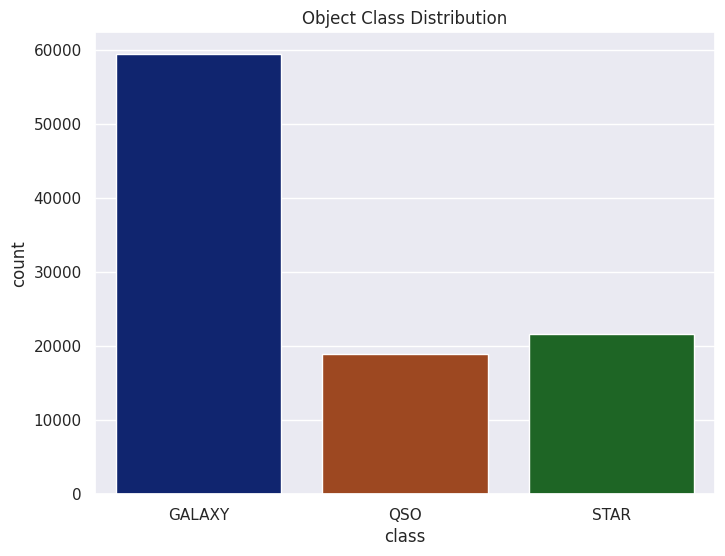

In [ ]:
plt.figure(figsize=(8, 6))

sns.set(style='darkgrid', palette="dark")
sns.countplot(x = data['class'])

plt.title('Object Class Distribution')
plt.show()

Можно обратить внимание, что галактик в данном датасете существенно больше, чем других классов.

Проиллюстрируем распределения некоторых признаков объектов с учетом их классов

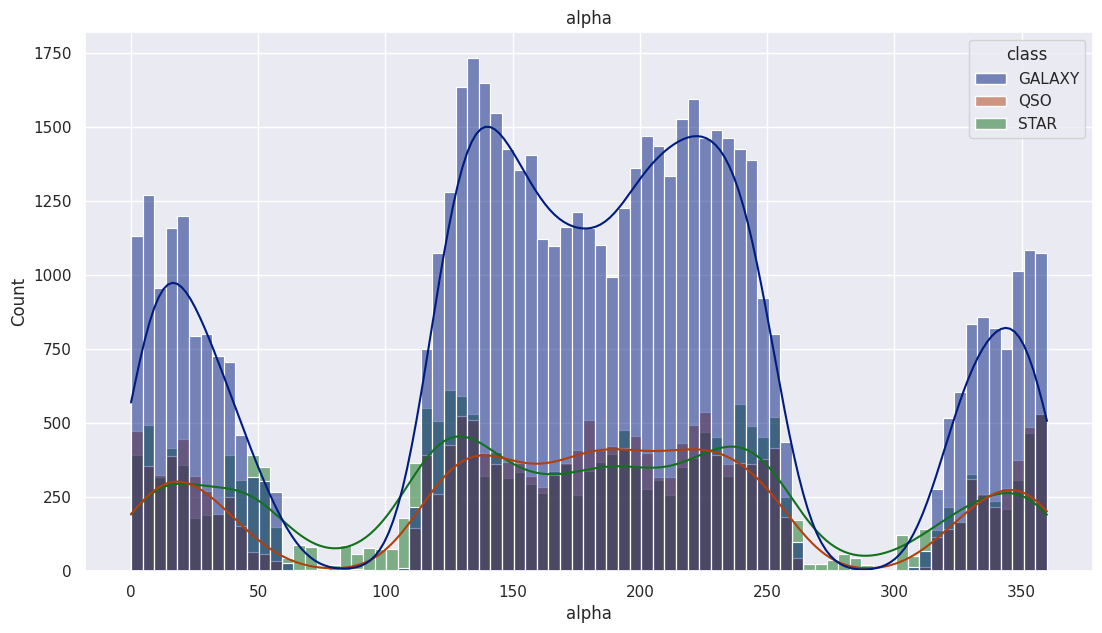

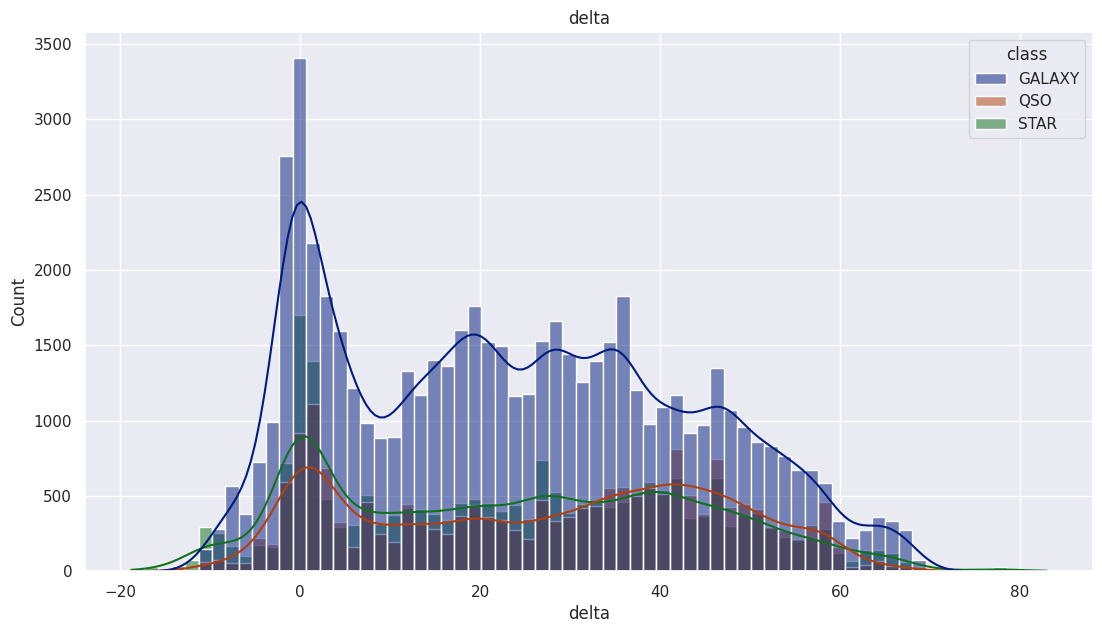

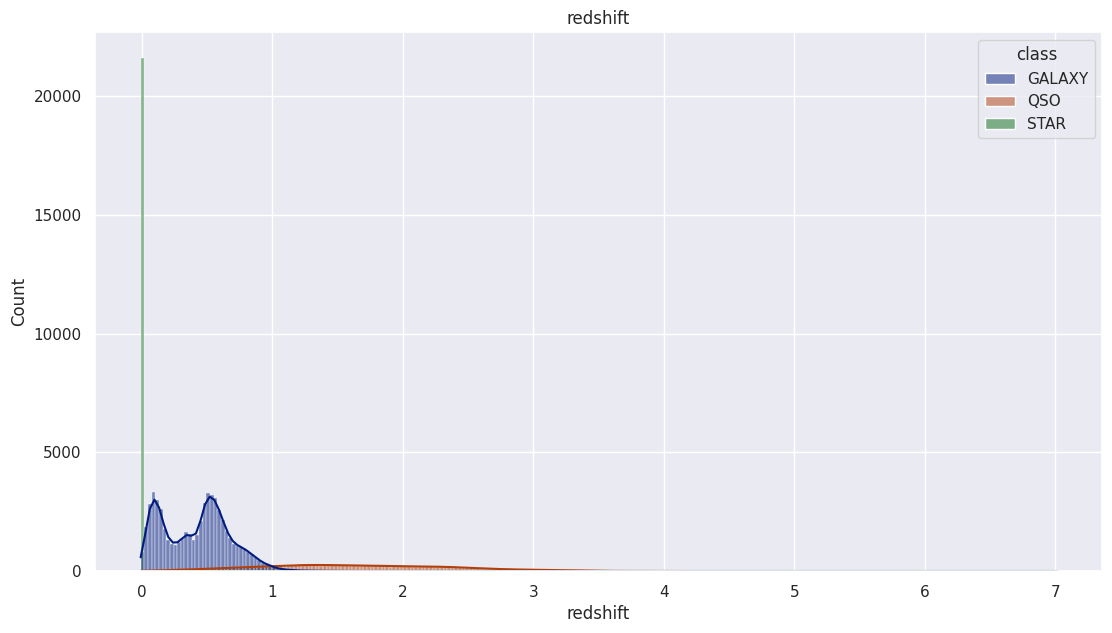

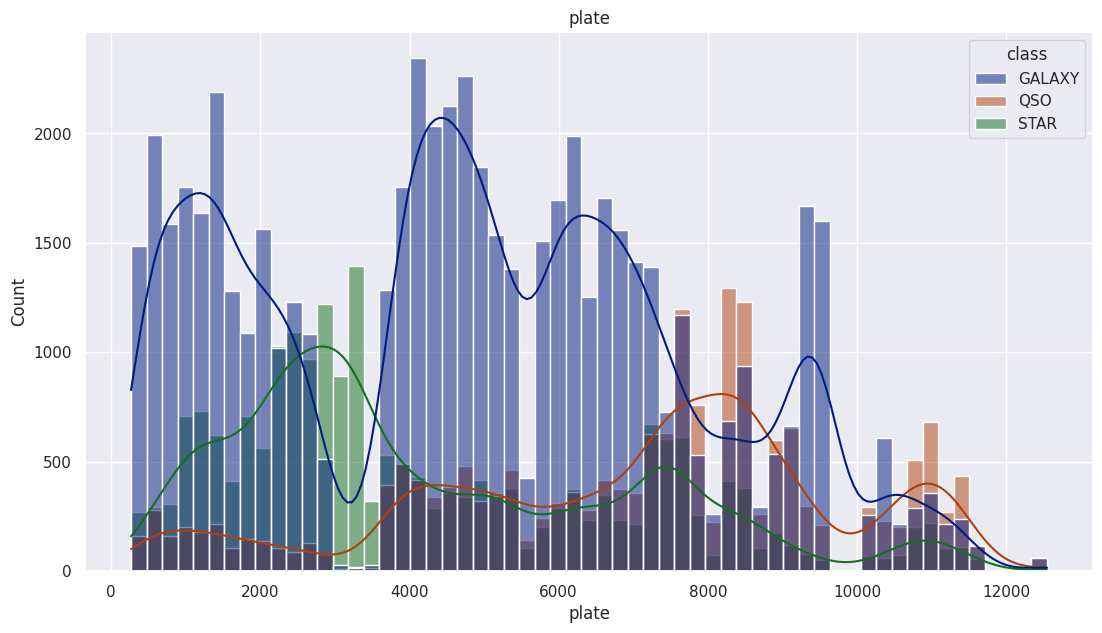

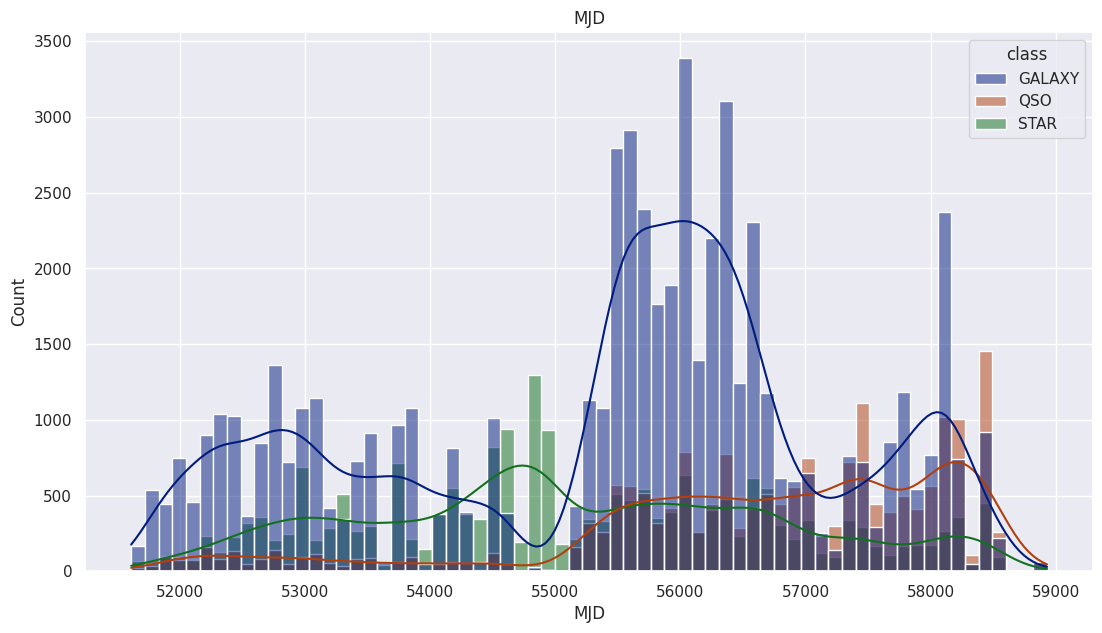

In [ ]:
for i in ['alpha', 'delta','redshift', 'plate', 'MJD']:
    plt.figure(figsize=(13,7))
    sns.histplot(data=data, x=i, kde=True, hue="class")
    plt.title(i)
    plt.show()

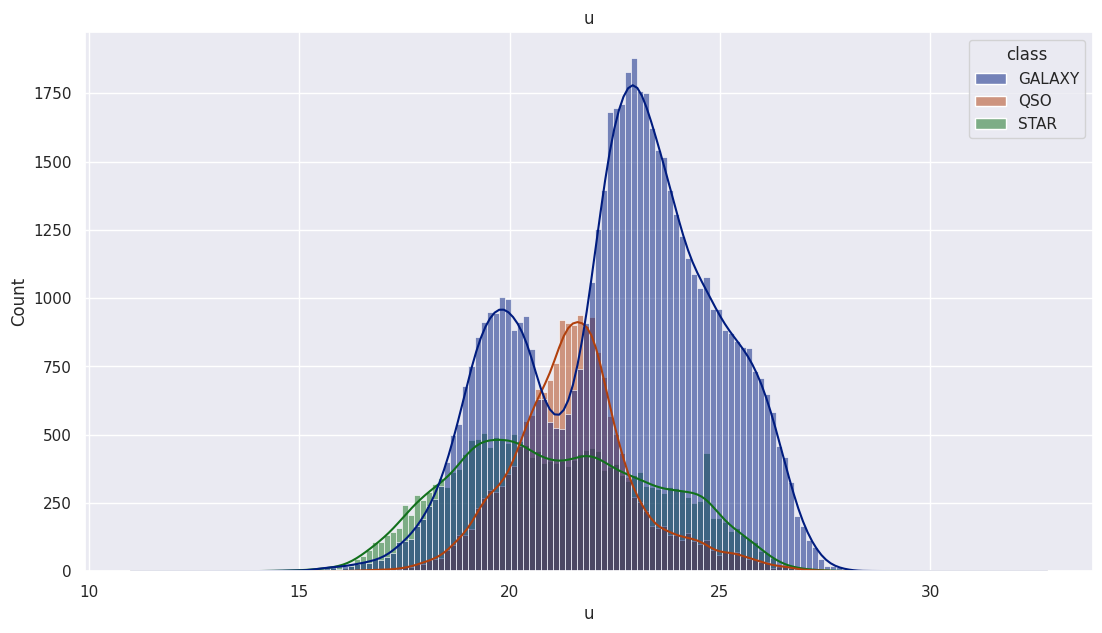

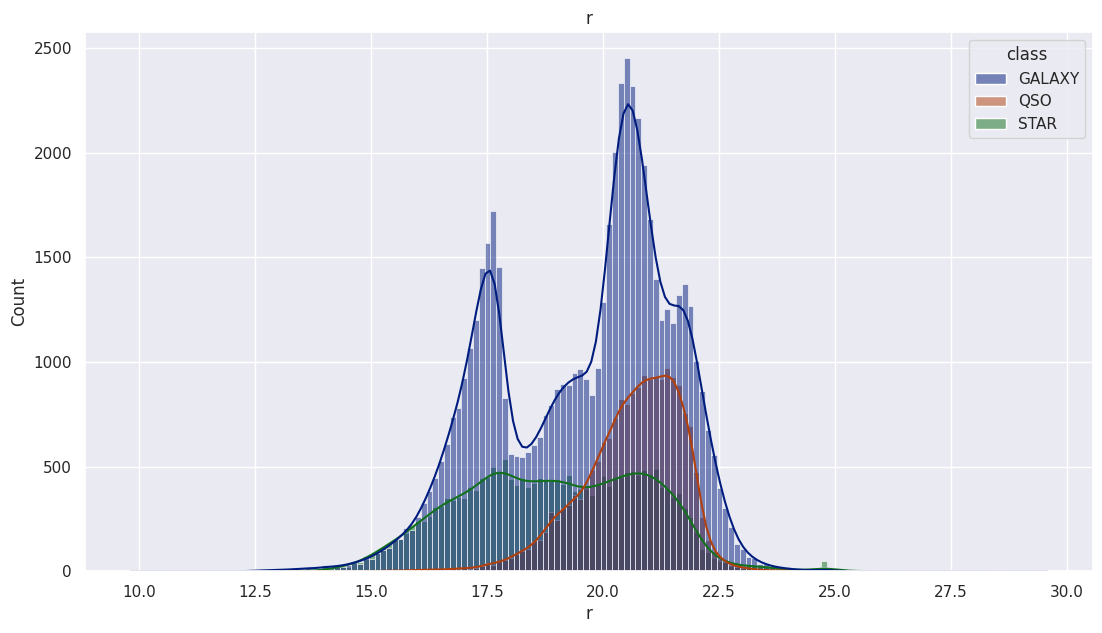

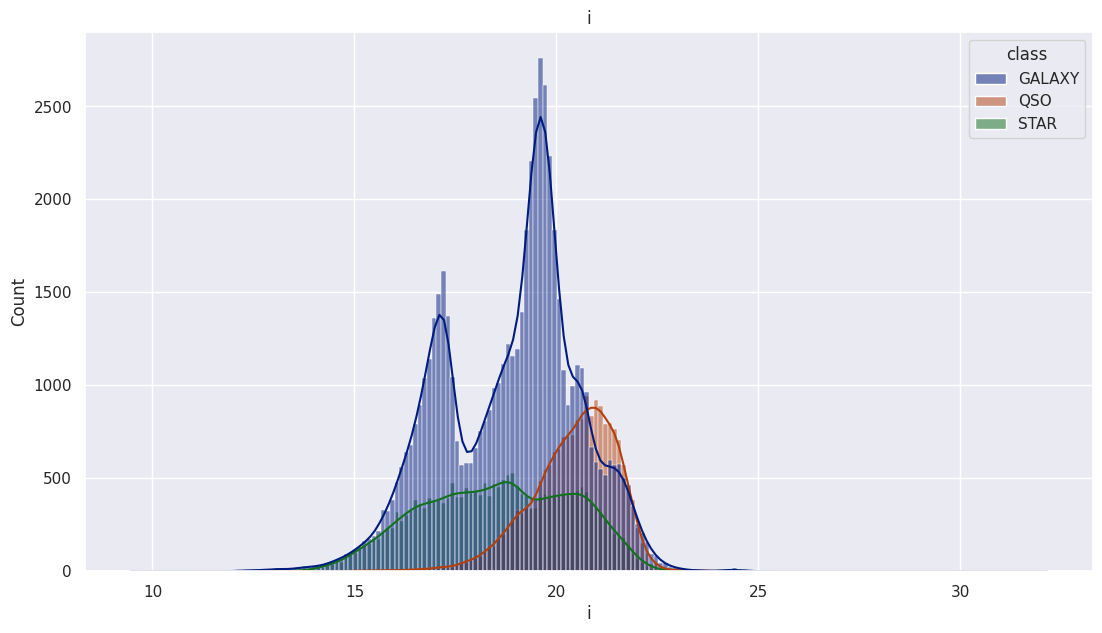

In [ ]:
for i in ['u','r', 'i']:
    plt.figure(figsize=(13,7))
    sns.histplot(data=data[data.u>-100], x=i, kde=True, hue="class")
    plt.title(i)
    plt.show()

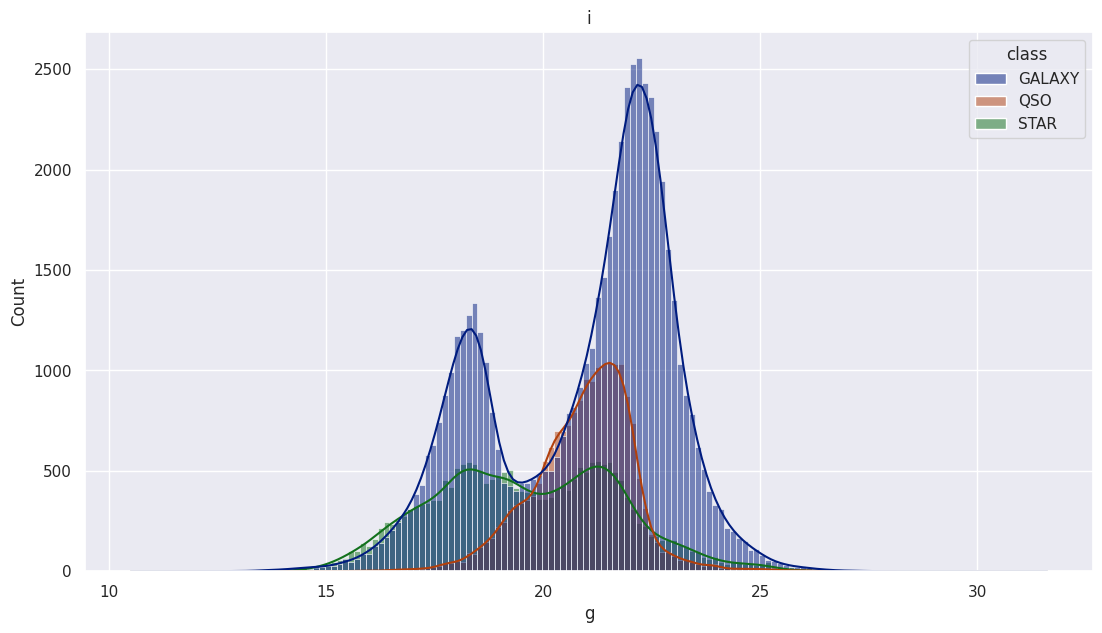

In [ ]:
plt.figure(figsize=(13,7))
sns.histplot(data=data[data.g>-100], x='g', kde=True, hue="class")
plt.title(i)
plt.show()

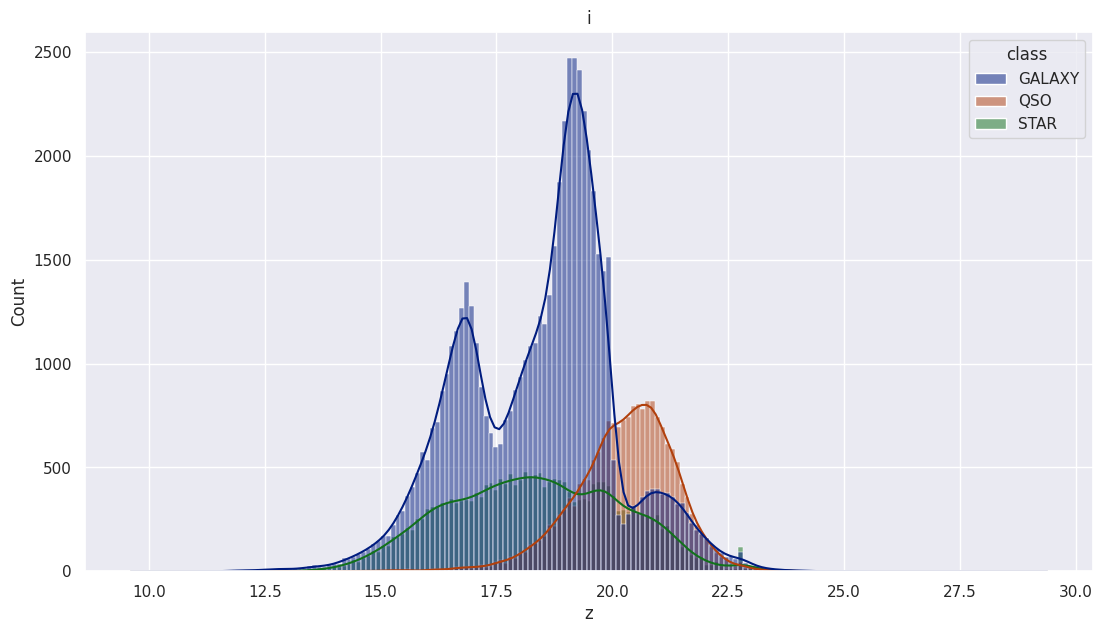

In [ ]:
plt.figure(figsize=(13,7))
sns.histplot(data=data[data.z>-100], x='z', kde=True, hue="class")
plt.title(i)
plt.show()

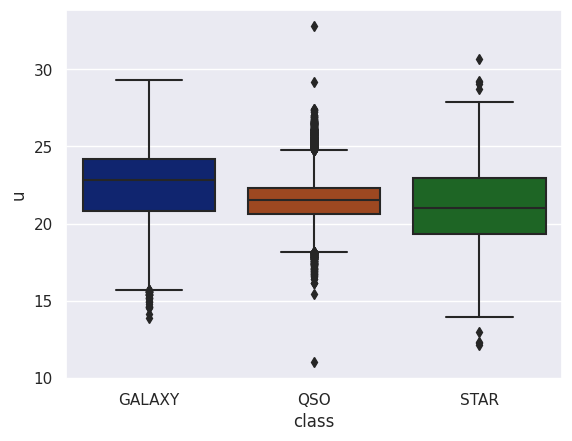

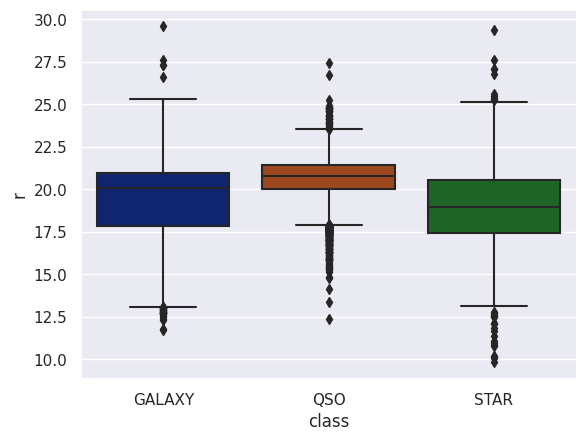

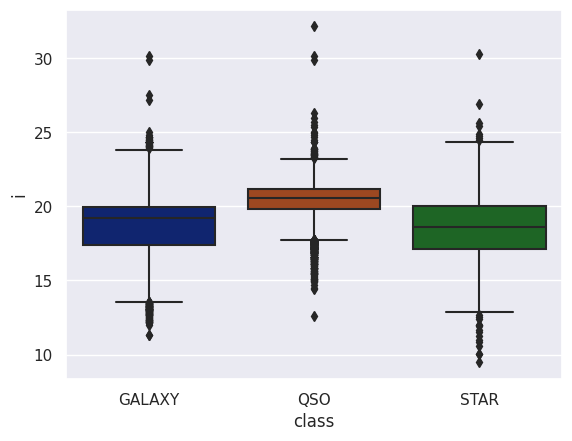

In [ ]:
for i in ['u','r', 'i']:
    plt.figure()
    sns.boxplot(x="class",y=i,data=data[data.u>-100])
    # sns.swarmplot(x='class',y=i,data=data,color='white',linewidth=1,edgecolor='k')
    plt.show()

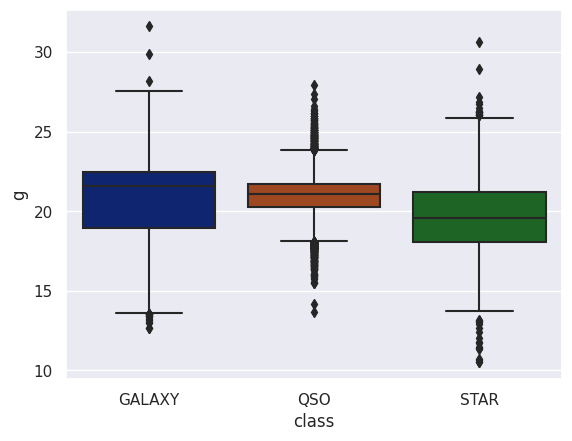

In [ ]:
plt.figure()
sns.boxplot(x="class",y='g',data=data[data.g>-100])
# sns.swarmplot(x='class',y=i,data=data,color='white',linewidth=1,edgecolor='k')
plt.show()

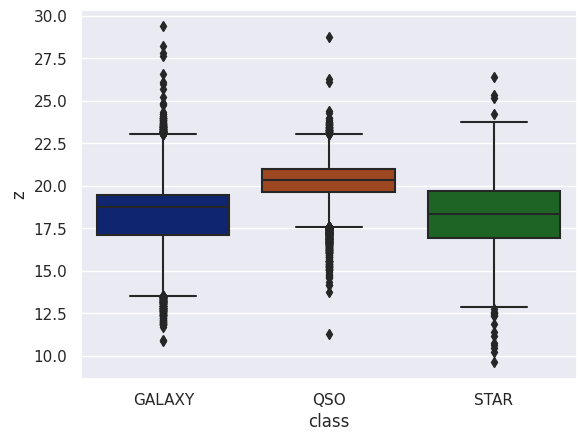

In [ ]:
plt.figure()
sns.boxplot(x="class",y='z',data=data[data.z>-100])
# sns.swarmplot(x='class',y=i,data=data,color='white',linewidth=1,edgecolor='k')
plt.show()

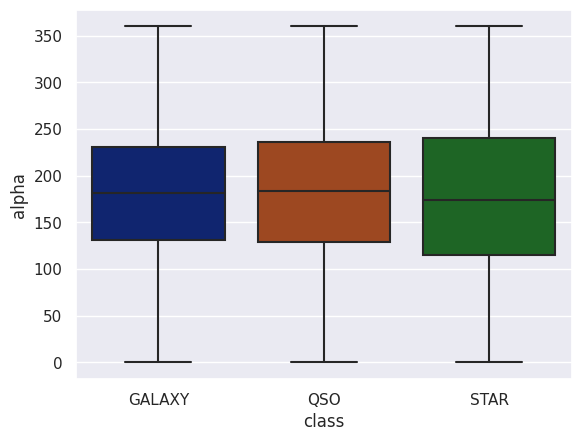

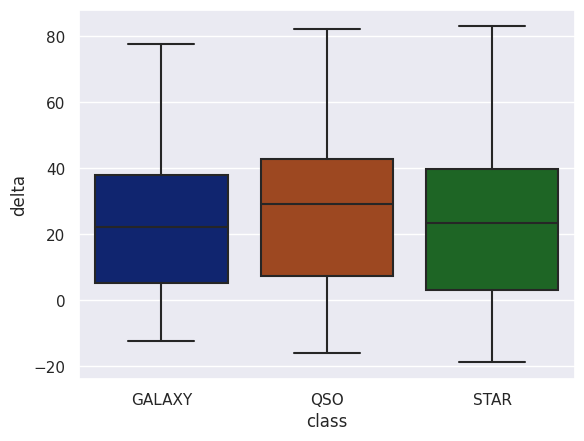

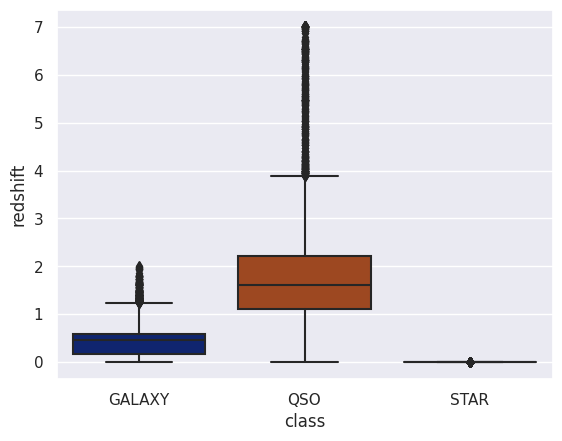

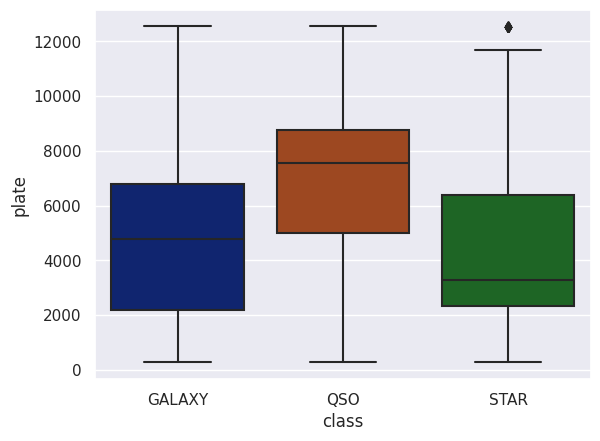

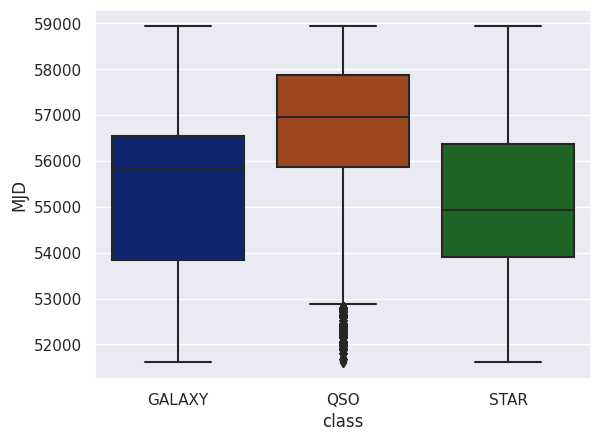

In [ ]:
for i in ['alpha', 'delta','redshift', 'plate', 'MJD']: #YOUR CODE HERE
    plt.figure()
    sns.boxplot(x="class",y=i,data=data)
    # sns.swarmplot(x='class',y=i,data=data,color='white',linewidth=1,edgecolor='k')
    plt.show()

По этим данным мы видим, что в некоторых случаях распределения для разных классов схожи (имеют общие положения пиков). В некоторых случаях (например, в распределении по дате MJD, углу восхождения и склонения) это можно объяснить причинами, не зависящими от физики процесса (данные могли быть получены в рамках одной исследовательской программы).

Однако есть распределения, которые являются характерными для данного класса: таковым, например, являются параметры redshift. Так, у представителей класса звёзд наблюдаем нулевое значение среднего и дисперсии, у представителей класса квазаров среднее значение и дисперсия самые большие. Распределения интенсивностей при наличии фильтров также являются характерными для каждого класса: распределение от галактик имеет 2 выраженных пика, среднее для распределения для квазаров сдвигается вправо при увеличении длины волны, среднее для распределения для звёзд сдвигается наоборот влево. В дальнейшем эти свойства могут помочь в построении алгоритма классификации объектов датасета.

Например, можно проверять различные гипотезы, сравнивая непрерывные параметры между разными группами. К парамметрическим выборкам можно применить критерии Стьюдента и ANOVA,преждевременно убедившись в том, что данные распределены нормально(тест Шапиро-Уилка, Колмогорова-Смирнова). В противном случае для "плохих" распределений будем использовать другие непарамметрические критерии. В результате проверки гипотез выберем наиболее подходящие признаки и алгоритм для классификации объектов на 3 группы.

Попробуем получить информацию о взаимосвязи признаков.

In [ ]:
#Расчет корреляционной матрицы
correlation_matrix = data.corr()

# Нахождение признаков с высокой корреляцией
threshold = 0.5
low_correlated_features = np.where(np.abs(correlation_matrix) > threshold)

for feature1, feature2 in zip(low_correlated_features[0], low_correlated_features[1]):
    if feature1 != feature2:
        print(f"{data.columns[feature1]} и {data.columns[feature2]} слабо коррелированы.")

obj_ID и run_ID слабо коррелированы.
u и g слабо коррелированы.
u и z слабо коррелированы.
g и u слабо коррелированы.
g и z слабо коррелированы.
r и i слабо коррелированы.
r и spec_obj_ID слабо коррелированы.
r и redshift слабо коррелированы.
r и plate слабо коррелированы.
i и r слабо коррелированы.
i и spec_obj_ID слабо коррелированы.
i и redshift слабо коррелированы.
i и plate слабо коррелированы.
z и u слабо коррелированы.
z и g слабо коррелированы.
run_ID и obj_ID слабо коррелированы.
spec_obj_ID и r слабо коррелированы.
spec_obj_ID и i слабо коррелированы.
spec_obj_ID и redshift слабо коррелированы.
spec_obj_ID и plate слабо коррелированы.
redshift и r слабо коррелированы.
redshift и i слабо коррелированы.
redshift и spec_obj_ID слабо коррелированы.
redshift и plate слабо коррелированы.
plate и r слабо коррелированы.
plate и i слабо коррелированы.
plate и spec_obj_ID слабо коррелированы.
plate и redshift слабо коррелированы.


<ipython-input-13-8c86f534e7be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()
